# DEEP LEARNING

## Keras Basics

Welcome to the section on deep learning! We'll be using Keras with a TensorFlow backend to perform our deep learning operations.

This means we should get familiar with some Keras fundamentals and basics!

### Imports

In [1]:
import numpy as np
from numpy import genfromtxt


### Dataset

We will use the Bank Authentication Data Set to start off with. This data set consists of various image features derived from images that had 400 x 400 pixels. You should note **the data itself that we will be using ARE NOT ACTUAL IMAGES**, they are **features** of images. In the next lecture we will cover grabbing and working with image data with Keras. This notebook focuses on learning the basics of building a neural network with Keras.

_____
More info on the data set:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

### Reading in the Data Set

We've already downloaded the dataset, its in the DATA folder. So let's open it up. 

In [2]:
data = genfromtxt('DATA/bank_note_data.txt', delimiter=',')

In [3]:
data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [4]:
labels = data[:,4]

In [5]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [6]:
features = data[:,0:4]

In [7]:
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [8]:
X = features
y = labels

### Split the Data into Training and Test

Its time to split the data into a train/test set. Keep in mind, sometimes people like to split 3 ways, train/test/validation. We'll keep things simple for now. **Remember to check out the video explanation as to why we split and what all the parameters mean!**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train

array([[-0.8734  , -0.033118, -0.20165 ,  0.55774 ],
       [ 2.0177  ,  1.7982  , -2.9581  ,  0.2099  ],
       [-0.36038 ,  4.1158  ,  3.1143  , -0.37199 ],
       ...,
       [-7.0364  ,  9.2931  ,  0.16594 , -4.5396  ],
       [-3.4605  ,  2.6901  ,  0.16165 , -1.0224  ],
       [-3.3582  , -7.2404  , 11.4419  , -0.57113 ]])

In [12]:
X_test

array([[ 1.5691  ,  6.3465  , -0.1828  , -2.4099  ],
       [-0.27802 ,  8.1881  , -3.1338  , -2.5276  ],
       [ 0.051979,  7.0521  , -2.0541  , -3.1508  ],
       ...,
       [ 3.5127  ,  2.9073  ,  1.0579  ,  0.40774 ],
       [ 5.504   , 10.3671  , -4.413   , -4.0211  ],
       [-0.2062  ,  9.2207  , -3.7044  , -6.8103  ]])

In [13]:
y_train

array([1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0.

In [14]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

### Standardizing the Data

Usually when using Neural Networks, you will get better performance when you standardize the data. Standardization just means normalizing the values to all fit between a certain range, like 0-1, or -1 to 1.

The scikit learn library also provides a nice function for this.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler_object = MinMaxScaler()

In [17]:
scaler_object.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaled_X_train = scaler_object.transform(X_train)

In [19]:
scaled_X_test = scaler_object.transform(X_test)

Ok, now we have the data scaled!

In [20]:
X_train.max()

17.9274

In [21]:
scaled_X_train.max()

1.0000000000000002

In [22]:
X_train

array([[-0.8734  , -0.033118, -0.20165 ,  0.55774 ],
       [ 2.0177  ,  1.7982  , -2.9581  ,  0.2099  ],
       [-0.36038 ,  4.1158  ,  3.1143  , -0.37199 ],
       ...,
       [-7.0364  ,  9.2931  ,  0.16594 , -4.5396  ],
       [-3.4605  ,  2.6901  ,  0.16165 , -1.0224  ],
       [-3.3582  , -7.2404  , 11.4419  , -0.57113 ]])

In [23]:
scaled_X_train

array([[4.44850688e-01, 5.14130449e-01, 2.18194638e-01, 8.50172258e-01],
       [6.53339968e-01, 5.82655745e-01, 9.93242398e-02, 8.17696322e-01],
       [4.81846700e-01, 6.69377018e-01, 3.61193167e-01, 7.63368407e-01],
       ...,
       [4.11050776e-04, 8.63104170e-01, 2.34046756e-01, 3.74261253e-01],
       [2.58284115e-01, 6.16029366e-01, 2.33861752e-01, 7.02643151e-01],
       [2.65661395e-01, 2.44444278e-01, 7.20316361e-01, 7.44775785e-01]])

### Building the Network with Keras

Let's build a simple neural network!

In [24]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
# Creates model
model = Sequential()

# 8 Neurons, expects input of 4 features. 
# Play around with the number of neurons!!
model.add(Dense(4, input_dim=4, activation='relu'))

# Add another Densely Connected layer (every neuron connected to every neuron in the next layer)
model.add(Dense(8, activation='relu'))

# Last layer simple sigmoid function to output 0 or 1 (our label)
model.add(Dense(1, activation='sigmoid'))

#### Compile Model

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit (Train) the Model

In [28]:
# Play around with number of epochs as well!
model.fit(scaled_X_train,y_train,epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 0.0898 - acc: 0.9771
Epoch 2/100
 - 0s - loss: 0.0870 - acc: 0.9804
Epoch 3/100
 - 0s - loss: 0.0855 - acc: 0.9815
Epoch 4/100
 - 0s - loss: 0.0822 - acc: 0.9837
Epoch 5/100
 - 0s - loss: 0.0803 - acc: 0.9848
Epoch 6/100
 - 0s - loss: 0.0792 - acc: 0.9826
Epoch 7/100
 - 0s - loss: 0.0774 - acc: 0.9848
Epoch 8/100
 - 0s - loss: 0.0745 - acc: 0.9848
Epoch 9/100
 - 0s - loss: 0.0728 - acc: 0.9826
Epoch 10/100
 - 0s - loss: 0.0714 - acc: 0.9848
Epoch 11/100
 - 0s - loss: 0.0703 - acc: 0.9837
Epoch 12/100
 - 0s - loss: 0.0677 - acc: 0.9859
Epoch 13/100
 - 0s - loss: 0.0658 - acc: 0.9837
Epoch 14/100
 - 0s - loss: 0.0648 - acc: 0.9869
Epoch 15/100
 - 0s - loss: 0.0633 - acc: 0.9869
Epoch 16/100
 - 0s - loss: 0.0621 - acc: 0.9869
Epoch 17/100
 - 0s - loss: 0.0602 - acc: 0.9869
Epoch 18/100
 - 0s - loss: 0.0592 - acc: 0.9880
Epoch 19/100
 - 0s - loss: 0.0579 - acc: 0.9859
Epoch 20/100
 - 0s - loss: 0.0563 - acc: 0.9902
Epoch 21/100
 - 0s - loss: 0.0559 - acc: 0.9880
E

### Predicting New Unseen Data

Let's see how we did by predicting on **new data**. Remember, our model has **never** seen the test data that we scaled previously! This process is the exact same process you would use on totally brand new data. For example , a brand new bank note that you just analyzed .

In [29]:
scaled_X_test

array([[0.62098955, 0.75284662, 0.21900753, 0.5730998 ],
       [0.48778602, 0.82175665, 0.09174727, 0.56211079],
       [0.51158363, 0.77924916, 0.13830875, 0.50392598],
       ...,
       [0.76115065, 0.62415668, 0.27251204, 0.83616757],
       [0.9047516 , 0.90329171, 0.03658247, 0.42267079],
       [0.49296526, 0.86039507, 0.06714046, 0.1622583 ]])

In [ ]:
# Spits out probabilities by default.
# model.predict(scaled_X_test)

In [30]:
model.predict_classes(scaled_X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

### Evaluating Model Performance

So how well did we do? How do we actually measure "well". Is 95% accuracy good enough? It all depends on the situation. Also we need to take into account things like recall and precision. Make sure to watch the video discussion on classification evaluation before running this code!

In [31]:
model.metrics_names

['loss', 'acc']

In [32]:
model.evaluate(x=scaled_X_test,y=y_test)

453/453 [==============================] - 0s 132us/step


[0.025626904809658332, 0.9955849889624724]

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
predictions = model.predict_classes(scaled_X_test)

In [35]:
confusion_matrix(y_test,predictions)

array([[256,   1],
       [  1, 195]], dtype=int64)

In [36]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       257
        1.0       0.99      0.99      0.99       196

avg / total       1.00      1.00      1.00       453



### Saving and Loading Models

Now that we have a model trained, let's see how we can save and load it.

In [37]:
model.save('myfirstmodel.h5')

In [38]:
from keras.models import load_model

In [39]:
newmodel = load_model('myfirstmodel.h5')

In [40]:
newmodel.predict_classes(X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

------

## Convolutional Neural Networks for Image Classification

In [43]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 20s 2us/step


###  Visualizing the Image Data

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
single_image = x_train[0]

In [47]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [48]:
single_image.shape

(28, 28)

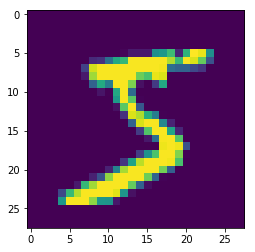

In [49]:
plt.imshow(single_image)

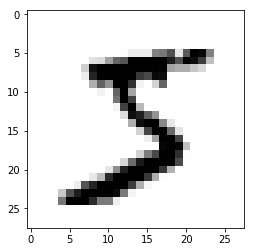

In [51]:
plt.imshow(single_image, cmap = 'gray_r')

### PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

#### Labels

In [52]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [53]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [54]:
y_train.shape

(60000,)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [55]:
from keras.utils.np_utils import to_categorical

In [56]:
y_train.shape

(60000,)

In [57]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [58]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Processing X Data

We should normalize the X data

In [60]:
single_image.max()

255

In [61]:
single_image.min()

0

In [63]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [64]:
scaled_single = x_train[0]

In [65]:
scaled_single.max()

1.0

In [66]:
scaled_single

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

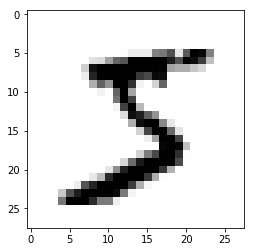

In [67]:
plt.imshow(scaled_single, cmap ='gray_r')

#### Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [68]:
x_train.shape

(60000, 28, 28)

In [69]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [70]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [71]:
x_train.shape

(60000, 28, 28, 1)

In [72]:
x_test = x_test.reshape(10000,28,28,1)

In [73]:
x_test.shape

(10000, 28, 28, 1)

### Training the Model

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [75]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


#### Train the Model

In [77]:
# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 56s 928us/step - loss: 0.1396 - acc: 0.9572
Epoch 2/2
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0490 - acc: 0.9855


### Evaluate the Model

In [78]:
model.metrics_names

['loss', 'acc']

In [79]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 329us/step


[0.06609907871133182, 0.981]

In [80]:
from sklearn.metrics import classification_report

In [81]:
predictions = model.predict_classes(x_test)

In [82]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [83]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [84]:
predictions[0]

7

In [85]:
y_cat_test.shape

(10000, 10)

In [86]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [87]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [88]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.97      0.98      1032
          3       1.00      0.98      0.99      1010
          4       0.97      1.00      0.98       982
          5       0.99      0.98      0.99       892
          6       0.99      0.98      0.98       958
          7       0.94      1.00      0.97      1028
          8       0.99      0.95      0.97       974
          9       0.99      0.96      0.98      1009

avg / total       0.98      0.98      0.98     10000



-----------

## CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

### The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [89]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 96s 1us/step


In [90]:
x_train.shape

(50000, 32, 32, 3)

In [91]:
x_train[0].shape

(32, 32, 3)

In [92]:
import matplotlib.pyplot as plt

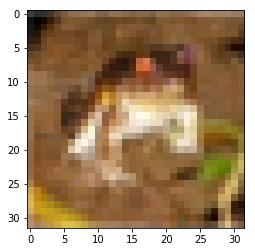

In [93]:
# FROG
plt.imshow(x_train[0])

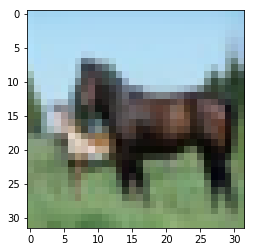

In [94]:
# HORSE
plt.imshow(x_train[12])

### PreProcessing

In [95]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [96]:
x_train[0].shape

(32, 32, 3)

In [97]:
x_train.max()

255

In [98]:
x_train = x_train/225

In [99]:
x_test = x_test/255

In [100]:
x_train.shape

(50000, 32, 32, 3)

In [101]:
x_test.shape

(10000, 32, 32, 3)

#### Labels

In [102]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [103]:
from keras.utils import to_categorical

In [104]:
y_train.shape

(50000, 1)

In [105]:
y_train[0]

array([6], dtype=uint8)

In [106]:
y_cat_train = to_categorical(y_train,10)

In [107]:
y_cat_train.shape

(50000, 10)

In [108]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [109]:
y_cat_test = to_categorical(y_test,10)

### Building the Model

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [111]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total para

In [113]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 24s 483us/step - loss: 1.5126 - acc: 0.4549
Epoch 2/10
50000/50000 [==============================] - 26s 512us/step - loss: 1.1595 - acc: 0.5945
Epoch 3/10
50000/50000 [==============================] - 26s 524us/step - loss: 1.0082 - acc: 0.6529
Epoch 4/10
50000/50000 [==============================] - 28s 566us/step - loss: 0.9007 - acc: 0.6898
Epoch 5/10
50000/50000 [==============================] - 29s 588us/step - loss: 0.8280 - acc: 0.7151
Epoch 6/10
50000/50000 [==============================] - 29s 577us/step - loss: 0.7671 - acc: 0.7392
Epoch 7/10
50000/50000 [==============================] - 27s 536us/step - loss: 0.7187 - acc: 0.7557
Epoch 8/10
50000/50000 [==============================] - 27s 531us/step - loss: 0.6821 - acc: 0.7707
Epoch 9/10
50000/50000 [==============================] - 27s 549us/step - loss: 0.6477 - acc: 0.7825
Epoch 10/10
50000/50000 [==============================] - 29s 585us/step - loss: 

In [114]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs1.h5')

In [115]:
model.metrics_names

['loss', 'acc']

In [116]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 192us/step


[1.1908291726112366, 0.6751]

In [117]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [118]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      0.66      0.71      1000
          1       0.84      0.80      0.82      1000
          2       0.72      0.39      0.50      1000
          3       0.45      0.57      0.51      1000
          4       0.46      0.81      0.59      1000
          5       0.64      0.50      0.56      1000
          6       0.86      0.69      0.76      1000
          7       0.72      0.77      0.75      1000
          8       0.81      0.79      0.80      1000
          9       0.77      0.79      0.78      1000

avg / total       0.70      0.68      0.68     10000



#### Optional: Large Model

In [119]:
model = Sequential()

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [120]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
50000/50000 [==============================] - 77s 2ms/step - loss: 1.5575 - acc: 0.4411
Epoch 2/20
50000/50000 [==============================] - 72s 1ms/step - loss: 1.1708 - acc: 0.5896
Epoch 3/20
50000/50000 [==============================] - 76s 2ms/step - loss: 1.0143 - acc: 0.6527
Epoch 4/20
50000/50000 [==============================] - 74s 1ms/step - loss: 0.9555 - acc: 0.6751
Epoch 5/20
50000/50000 [==============================] - 73s 1ms/step - loss: 0.9246 - acc: 0.6884
Epoch 6/20
50000/50000 [==============================] - 71s 1ms/step - loss: 0.9111 - acc: 0.6982
Epoch 7/20
50000/50000 [==============================] - 79s 2ms/step - loss: 0.8920 - acc: 0.7043
Epoch 8/20
50000/50000 [==============================] - 88s 2ms/step - loss: 0.8855 - acc: 0.7076
Epoch 9/20
50000/50000 [==============================] - 81s 2ms/step - loss: 0.8767 - acc: 0.7119
Epoch 10/20
50000/50000 [==============================] - 93s 2ms/step - loss: 0.8769 - acc: 0.7125

In [ ]:
import gc
gc.collect()

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
model.save('larger_CIFAR10_model.h5')

-----------